In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
%matplotlib inline
plt.rcParams.update({'font.size': 14})
%config InlineBackend.figure_format = 'retina'

In [2]:
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017GL075860
glhymps = gpd.read_file('../Data/GLHYMPS/GLHYMPS/GLHYMPS.gdb')
glhymps = glhymps.to_crs('ESRI:54030')
glhymps['geomx'] = glhymps.geometry.centroid.x
glhymps['geomy'] = glhymps.geometry.centroid.y

In [2]:
usa = gpd.read_file('../Data/maps_and_boundaries/US_state_outline/cb_2018_us_state_500k.shp')#.to_crs('ESRI:54030')

In [4]:
glhymps_usa = glhymps[(glhymps.geomx>-1.25e7) &
       (glhymps.geomx<-0.5e7) &
       (glhymps.geomy>2.5e6) &
       (glhymps.geomy<7e6)]#.head(1000000).plot()

In [5]:
# joined = gpd.sjoin(glhymps_usa,usa,how='right')

In [6]:
# joined = joined.merge(glhymps[['IDENTITY_','geometry']],left_on='IDENTITY_',
#                      right_on='IDENTITY_',how='left')
joined = glhymps_usa
joined = joined[['IDENTITY_','Shape_Length','Shape_Area','Porosity','Permeability_no_permafrost',
                'Permeability_permafrost','Permeability_standard_deviation','geometry']]

In [7]:
# joined = gpd.GeoDataFrame(joined, geometry=joined.geometry_y)

In [3]:
# limit to only gagesII points
gagesII = gpd.read_file('../Data/gagesII_data_and_subsets/gagesII.shp').to_crs('ESRI:54030')

In [4]:
# bring in shapefile of gagesII basins
gagesII_basins = gpd.read_file('../Data/boundaries-shapefiles-by-aggeco/bas_ref_all.shp')
for f in ['bas_nonref_AKHIPR.shp',
         'bas_nonref_CntlPlains.shp',
         'bas_nonref_EastHghlnds.shp',
         'bas_nonref_MxWdShld.shp',
         'bas_nonref_NorthEast.shp',
         'bas_nonref_SECstPlain.shp',
         'bas_nonref_SEPlains.shp',
         'bas_nonref_WestMnts.shp',
         'bas_nonref_WestPlains.shp',
         'bas_nonref_WestXeric.shp']:
    gagesII_temp = gpd.read_file('../Data/boundaries-shapefiles-by-aggeco/'+f)
    gagesII_basins = pd.concat([gagesII_basins,gagesII_temp])
gagesII_basins = gagesII_basins[gagesII_basins.GAGE_ID.isin(gagesII.STAID)]

In [10]:
gagesII_basins1 = gpd.sjoin(gagesII_basins.to_crs('ESRI:54030'),joined.set_crs('ESRI:54030'),how='left')

In [98]:
gagesII_keep_pts = gagesII_basins1.reset_index()[['Shape_Area','Porosity','geometry','index_right','GAGE_ID']]
gagesII_keep_pts = gagesII_keep_pts.merge(joined['geometry'],left_on='index_right',right_index=True,)
gagesII_keep_pts = gagesII_keep_pts.rename(columns={'geometry_x':'basin_geometry','geometry_y':'GLHYMPS_geometry',
                                 'Shape_Area':'GLHYMPS_Shape_Area'}).drop(columns='index_right')
gagesII_keep_pts = gagesII_keep_pts.set_index('GAGE_ID').sort_index().reset_index()[['GAGE_ID','Porosity',
                                                                  'GLHYMPS_Shape_Area',
                                                                  'GLHYMPS_geometry','basin_geometry']]
# gagesII_keep_pts.to_csv('../Data/GLHYMPS_Porosity_by_gauges.csv',index='False')
for gage in gagesII_keep_pts.GAGE_ID.drop_duplicates():
#     print(gage)
    gagevals = gagesII_keep_pts[gagesII_keep_pts.GAGE_ID==gage]
    pvals = gagevals.Porosity.drop_duplicates().values
    for p in pvals:
        gages_sub = gagevals[gagevals.Porosity==p]
        shorter_add = gages_sub.iloc[0:1]
        if len(pvals)==1:
            shorter_add.GLHYMPS_geometry = shorter_add.basin_geometry
        else:
            shorter_add.GLHYMPS_geometry = np.nan
        shorter_add.GLHYMPS_Shape_Area = np.nansum(gages_sub.GLHYMPS_Shape_Area)
        
        if gage==gagesII_keep_pts.GAGE_ID.drop_duplicates()[0]:
            shorter_gagesII = shorter_add
        else:
            shorter_gagesII = pd.concat([shorter_gagesII,shorter_add])


01095220
01095375
01104430
01104460
01104475
01362500
01372058
01388000
01417500
01420500
01421000
01425000
01426500
01427510


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

01428500
01429000
01436690
01447800
01449360
01463500
01466500
01480400
01480500
01480617
01480870


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

01481000
01595200
01608500
02011400
02011500
02011800
02012500
02035000
02077200
02110704


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

02148315
02156500
02160105
02160700
02163001
02168504
02169000
02203655
02203700
02204070
02207120
02207185
02207385
02207400
02208150
02217274
02218565


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

02296750
02298202
02300021
02301719
02304510
02310650
02310700
02310747
02323592
02330450
02334430
02334480
02334578
02334885


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

02335000
02335350
02336030
02336120
02336240
02336300
02336360
02336410
02336526
02336728
02337170
02397000
02423130
02423496
02455980
02457595


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

02458450
03081000
03176500
03195500
03234300
03323500
03373980
03374500
03428200
03597860
04043238
04043244


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

04121944
04121970
04124000
04124200
04125460
04125550
04136000
04136500
04136900
04137005
04137500
04193500
04208000

/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


04232034
05058000
05430500
05435943
05454500
05455000
05462000
05465500
05474000
06036905
06041000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

06054500
06066500
06465500
06710000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

06711565
06775500
06881000
06894000
07056515
07061270
07086000
07096000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

07097000
07099970
07106000
07106500
07109500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

07119700
07124000
07130500
07144100
07144780
07177500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

07178200
07227500
07239450
07239700


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

07311782
07312100
07312500
08049500
08062500
08065350


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

08068400
08068500
08070200
08123800
08123850
08181500
08181800


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

08317400
09095500
09105000
09152500
09163500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

09169500
09171100
09217000
09234500
09302000
09371492


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

09371520
09406000
10129900
10133800
10261500
10301500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

10343500
10348200
10351650
10351700
11044000
11074000
11111500
11176900
11187000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11203580
11204100
11204900
11209900
11210950
11251000
11257500
11261500
11274538
11276500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11276600
11289650
11302000
11303000
11308900
11319500
11325500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11342000
11381500
11383500
11388000
11390000
11390500
11394500
11404500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11405300
11407000
11427000
11446500
11454000
11462500
11463980


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11464000
11467000
11467600
11470500
11477000
11480500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11501000
11507500
11509500
11516530
11520500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

11523000
11530000
11532500
12011500
12116500
12117600
12119000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

12147500
12147600
12148000
12148300
12323770
12413370
12413445
13331500
13340000
13340600


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

13341050
13342500
14020000
14046890
14076500
14087400
14091500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14092500
14103000
14138850
14138870
14138900
14139800
14144900
14145500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14148000
14150000
14150300
14150800
14151000
14152000
14152500
14153500
14155500


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14159200
14159500
14161100
14161500
14162500
14166000
14169000
14174000
14178000

/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


14179000
14180300
14181500
14182500
14187200
14187500
14197900


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14202980
14206950
14211010
14211400
14211499
14211500
14211550
14316495


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14316500
14318000
14319500
14321000
14330000
14334700


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

14337500
14337600
14337800
14337870
14338000
14339000
14362000
14366000
14369500

/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


14372300
15081497
15085100
15261000


/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/Dana/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [99]:
shorter_gagesII.drop(columns=['GLHYMPS_geometry','basin_geometry']).to_csv('../Data/GLHYMPS_Porosity_by_gauges.csv',index='False')

In [28]:
gagesII_basins1['weightedPorosity'] = (gagesII_basins1.Porosity*gagesII_basins1.Shape_Area)
gagesII_basins1['weightedPermeability'] = gagesII_basins1.Permeability_permafrost*gagesII_basins1.Shape_Area
gagesII_basins1['weighted_Perm_stdev'] = gagesII_basins1.Permeability_standard_deviation*gagesII_basins1.Shape_Area

gages_areas = gagesII_basins1.groupby('GAGE_ID').sum().Shape_Area
gages_means = gagesII_basins1.groupby('GAGE_ID').sum().drop(columns=['Shape_Length','index_right',
                                                                     'Shape_Area','Porosity','Permeability_no_permafrost',
                                                                     'Permeability_permafrost','Permeability_standard_deviation'])

gages_means['weighted_areas'] = gages_areas
gages_means['Porosity'] = gages_means.weightedPorosity/gages_means.weighted_areas
gages_means['Permeability_permafrost'] = gages_means.weightedPermeability/gages_means.weighted_areas
gages_means['Permeability_standard_deviation'] = gages_means.weighted_Perm_stdev/gages_means.weighted_areas
gages_means = gages_means.drop(columns=['weightedPorosity','weightedPermeability','weighted_Perm_stdev'])

In [29]:
gages_means = gages_means.reset_index()

In [30]:
gages_means

,GAGE_ID,AREA,PERIMETER,weighted_areas,Porosity,Permeability_permafrost,Permeability_standard_deviation
0,01095220,1.573788e+09,1062768.0,6.351523e+08,0.010000,-14.100000,1.500000
1,01095375,4.031720e+09,3374700.0,1.124383e+09,0.010099,-14.098026,1.500370
2,01104430,1.224657e+08,221340.0,3.406635e+08,0.010000,-14.100000,1.500000
3,01104460,7.996464e+08,740880.0,4.483824e+08,0.010000,-14.100000,1.500000
4,01104475,4.161600e+06,17160.0,4.680696e+07,0.010000,-14.100000,1.500000
...,...,...,...,...,...,...,...
306,14369500,2.117302e+11,33653880.0,3.438681e+09,0.100356,-14.174765,1.798125
307,14372300,7.433248e+12,636242040.0,1.806052e+10,0.116391,-13.615767,1.857549
308,15081497,1.324640e+08,59947.3,2.574054e+09,0.190000,-15.200000,2.500000
309,15085100,3.056820e+07,48690.8,6.598797e+08,0.190000,-15.200000,2.500000


In [15]:
# gagesII_join = gpd.sjoin(gagesII,joined.set_crs('ESRI:54030'),how='left')

In [17]:
# gagesII_join = gagesII_join[['STAID','STANAME','LAT_GAGE','LNG_GAGE','geometry','Porosity',
#              'Permeability_no_permafrost','Permeability_permafrost','Permeability_standard_deviation',
#              'geometry_y']]

In [42]:
# calculate hydraulic conductivity, K
# K = k*rho*g/mu [m/s]
# k = permeability (10^(k_reported/100)) [m2]
# rho = 999.97 kg/m3
# g = 9.81 m/s2
# mu = 1e-3
gagesII_join = gages_means

gagesII_join['hydraulic_conductivity'] = np.exp(gagesII_join['Permeability_permafrost'])*1e7
gagesII_join['hydraulic_conductivity_min'] = np.exp((gagesII_join.Permeability_permafrost-
                                             gagesII_join.Permeability_standard_deviation))*1e7
gagesII_join['hydraulic_conductivity_max'] = np.exp((gagesII_join.Permeability_permafrost+
                                             gagesII_join.Permeability_standard_deviation))*1e7
# gagesII_join['hydraulic_conductivity_std'] = (gagesII_join.hydraulic_conductivity_max-gagesII_join.hydraulic_conductivity_min)/2

In [43]:
gagesII_join.to_csv('gagesII_join_aquifer_params.csv',index=False)

# ----------------------------------
## Now we don't have to redo the calculations above this line again

In [6]:
gagesII_join = pd.read_csv('gagesII_join_aquifer_params.csv')
gagesII = gpd.read_file('../Data/gagesII_data_and_subsets/gagesII.shp').to_crs('EPSG:4326')
# bring in shapefile of gagesII basins
gagesII_basins = gpd.read_file('../Data/boundaries-shapefiles-by-aggeco/bas_ref_all.shp')
for f in ['bas_nonref_AKHIPR.shp',
         'bas_nonref_CntlPlains.shp',
         'bas_nonref_EastHghlnds.shp',
         'bas_nonref_MxWdShld.shp',
         'bas_nonref_NorthEast.shp',
         'bas_nonref_SECstPlain.shp',
         'bas_nonref_SEPlains.shp',
         'bas_nonref_WestMnts.shp',
         'bas_nonref_WestPlains.shp',
         'bas_nonref_WestXeric.shp']:
    gagesII_temp = gpd.read_file('../Data/boundaries-shapefiles-by-aggeco/'+f)
    gagesII_basins = pd.concat([gagesII_basins,gagesII_temp])
gagesII_basins = gagesII_basins[gagesII_basins.GAGE_ID.isin(gagesII.STAID)]
gagesII_basins = gagesII_basins.to_crs('EPSG:4326')

<AxesSubplot:>

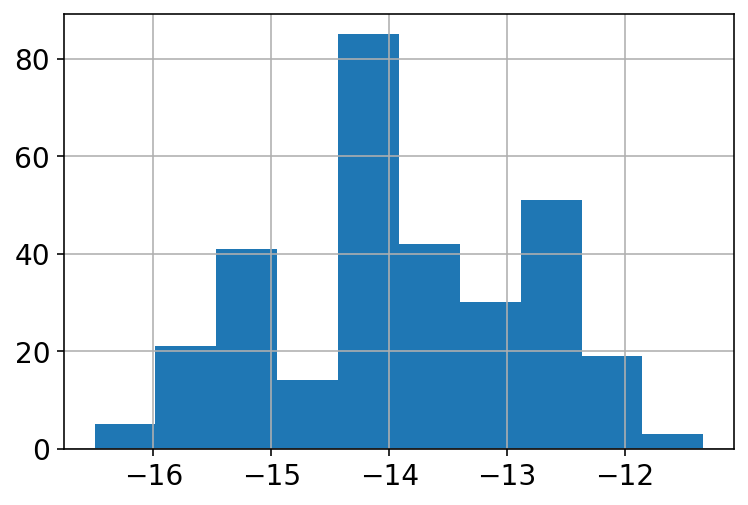

In [44]:
gagesII_join.Permeability_permafrost.hist()

In [45]:
# import depth to bedrock data
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0169748
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016MS000686
# http://globalchange.bnu.edu.cn/research/dtbd.jsp


import rasterio
from rasterio.warp import reproject, Resampling, calculate_default_transform
test = rasterio.open('../Data/bigfiles/BDTICM_M_1km_ll.tif')

In [47]:
# plt.imshow(test.read(1)/100,vmin = 0,vmax = 250)
# plt.colorbar()

In [48]:
gagesII_join['GAGE_ID'] = gagesII_join.GAGE_ID.astype('int')
gagesII['STAID'] = gagesII.STAID.astype('int')
gagesII_basins['GAGE_ID'] = gagesII_basins.GAGE_ID.astype('int')

In [49]:
gagesII_join = gagesII_join.merge(gagesII_basins[['GAGE_ID','geometry']],left_on='GAGE_ID',
                  right_on='GAGE_ID',how='left')

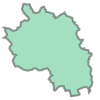

In [50]:
gagesII_join.geometry.iloc[0]

In [51]:
from rasterstats import zonal_stats

DTB_zonal_stats = zonal_stats(gagesII_join.geometry, '../Data/bigfiles/BDTICM_M_1km_ll.tif')



In [52]:
DTB_zonal_mean = [DTB_zonal_stats[i]['mean']/100 for i in range(len(DTB_zonal_stats))]

In [53]:
# gagesII_reproj = gagesII_join.to_crs('EPSG:4326')
# print('total',len(gagesII_reproj))
# DTB = []
# for i in range(len(gagesII_reproj)):
#     print(i)
#     try:
#         xycoord = test.index(gagesII_reproj.geometry.centroid.x.values[i],
#                gagesII_reproj.geometry.centroid.y.values[i])
#         DTB.append((test.read(1)[xycoord[0]][xycoord[1]])/100)
#     except:
#         DTB.append(np.nan)

(array([241.,  62.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([  3.55286275,  20.22083915,  36.88881556,  53.55679197,
         70.22476838,  86.89274479, 103.5607212 , 120.22869761,
        136.89667402, 153.56465043, 170.23262684]),
 <BarContainer object of 10 artists>)

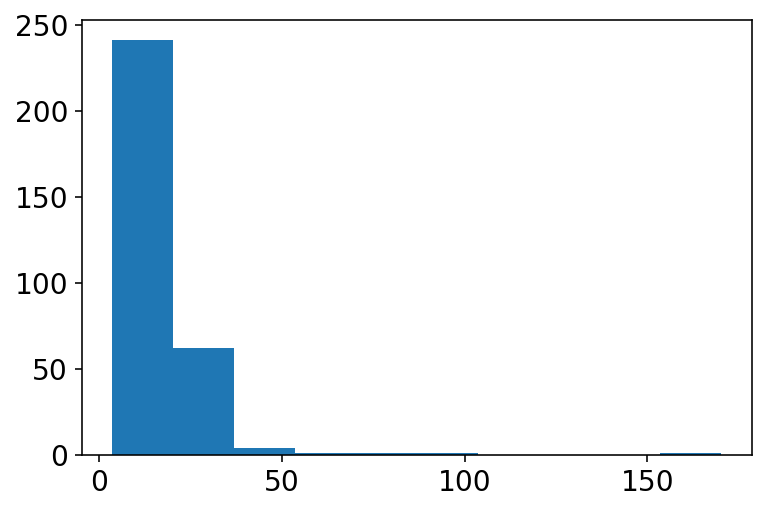

In [54]:
plt.hist(DTB_zonal_mean)
# gagesII_reproj['DTB'] = DTB

In [55]:
gagesII_join['DTB'] = DTB_zonal_mean

In [56]:
# calculate transmissivity, T
# T = K b

gagesII_join['Transmissivity'] = gagesII_join.hydraulic_conductivity*gagesII_join.DTB

In [57]:
gagesII_join = gagesII_join.merge(gagesII[['STAID','LAT_GAGE','STANAME','LNG_GAGE']],left_on='GAGE_ID',
                  right_on='STAID',how='left')

In [58]:
gagesII_join[['GAGE_ID','STANAME','LAT_GAGE','LNG_GAGE','Porosity','Transmissivity']].to_csv('../Data/GAGESII_aquifer_params.csv')

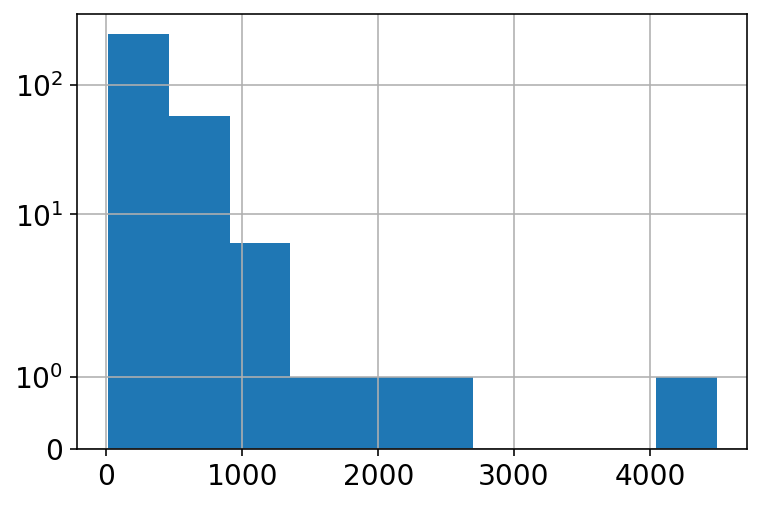

In [62]:
gagesII_join.Transmissivity.hist()
plt.yscale('symlog')

In [63]:
gagesII_join.Transmissivity.min(),gagesII_join.Transmissivity.max()

(10.337698778015666, 4490.549008895475)

In [ ]:
# calculate storativity, S

Get Transmissivity from Zell and Sanford

In [49]:
gagesII_basins_aea = gagesII_basins.to_crs(aea)

<AxesSubplot:>

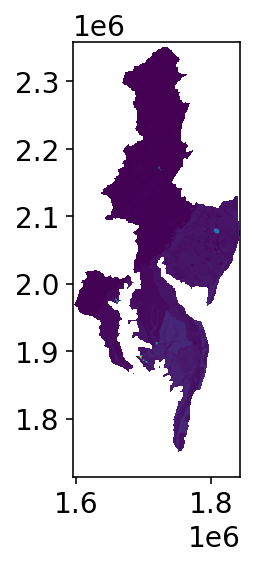

In [142]:
import rasterio
from rasterio.plot import show
import os
from rasterio.merge import merge
from pyproj.crs import CRS

directory = '../Data/Output_Subdomain/'
fig,ax = plt.subplots(1)
mosaic_files = []
for filename in os.listdir(directory):
    if (filename.endswith('trans.tif')) & (filename =='0204_0206_0209_MF6_SS_Unconfined_250_trans.tif'):
        img = rasterio.open(directory+filename)
        mosaic_files.append(img)
        show(img, ax = ax)
        
usa.to_crs(aea).boundary.plot(ax=ax)

# gagesII_basins_aea.iloc[0:1].boundary.plot(ax=ax)
# axr.set_ylim(2000000,5000000)
# axr.set_xlim(-1000000,-2000000)



In [120]:
gagesII_basins_aea.to_file('../Data/gagesII_basins_aea.shp')

In [143]:
# import ogr
from osgeo import gdal, ogr

intersect_files = {i:[] for i in range(len(gagesII_basins_aea))}
vector = ogr.Open('../Data/gagesII_basins_aea.shp')

for i in range(len(gagesII_basins_aea)):
    print(i)
    for filename in os.listdir(directory):
        if filename.endswith('trans.tif'):
            raster = gdal.Open(directory + filename)

            # Get raster geometry
            transform = raster.GetGeoTransform()
            pixelWidth = transform[1]
            pixelHeight = transform[5]
            cols = raster.RasterXSize
            rows = raster.RasterYSize

            xLeft = transform[0]
            yTop = transform[3]
            xRight = xLeft+cols*pixelWidth
            yBottom = yTop+rows*pixelHeight

            ring = ogr.Geometry(ogr.wkbLinearRing)
            ring.AddPoint(xLeft, yTop)
            ring.AddPoint(xLeft, yBottom)
            ring.AddPoint(xRight, yBottom)
            ring.AddPoint(xRight, yTop)
            ring.AddPoint(xLeft, yTop)
            rasterGeometry = ogr.Geometry(ogr.wkbPolygon)
            rasterGeometry.AddGeometry(ring)

            # Get vector geometry
            layer = vector.GetLayer()
            feature = layer.GetFeature(i)
            vectorGeometry = feature.GetGeometryRef()

            if  (rasterGeometry.Intersect(vectorGeometry)):
                print(filename)
                intersect_files[i].append(filename)

0
0204_0206_0209_MF6_SS_Unconfined_250_trans.tif
1
0505_0507_0510_MF6_SS_Unconfined_250_trans.tif
0501_0502_0503_MF6_SS_Unconfined_250_trans.tif
0206_0207_0208_MF6_SS_Unconfined_250_trans.tif
2
0301_0302_0303_MF6_SS_Unconfined_250_trans.tif
0304_0305_0306_MF6_SS_Unconfined_250_trans.tif
3
0401_0402_0416_0417_0418_MF6_SS_Unconfined_250_trans.tif
4
0401_0402_0416_0417_0418_MF6_SS_Unconfined_250_trans.tif
5
0403_0404_0707_0709_0712_MF6_SS_Unconfined_250_trans.tif
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
6
0403_0404_0707_0709_0712_MF6_SS_Unconfined_250_trans.tif
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
7
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
8
1704_1705_1706_MF6_SS_Unconfined_250_trans.tif
0904_1002_1003_1004_1005_1007_MF6_SS_Unconfined_250_trans.tif
9
1018_1019_MF6_SS_Unconfined_250_trans.tif
1015_1020_1021_1022_1023_MF6_SS_Unconfined_250_trans.tif
10
1111_1114_MF6_SS_Unconfined_250_trans.tif
1101_1107_MF6_SS_Unconfined_250_trans.tif
11
1024_1028_1029_1

0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
83
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
84
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
85
0406_0407_0408_0416_MF6_SS_Unconfined_250_trans.tif
86
0104_0106_0107_0109_MF6_SS_Unconfined_250_trans.tif
0414_0415_MF6_SS_Unconfined_250_trans.tif
0108_0110_0202_0203_MF6_SS_Unconfined_250_trans.tif
87
0104_0106_0107_0109_MF6_SS_Unconfined_250_trans.tif
0414_0415_MF6_SS_Unconfined_250_trans.tif
0108_0110_0202_0203_MF6_SS_Unconfined_250_trans.tif
88
0104_0106_0107_0109_MF6_SS_Unconfined_250_trans.tif
89
0104_0106_0107_0109_MF6_SS_Unconfined_250_trans.tif
90
0104_0106_0107_0109_MF6_SS_Unconfined_250_trans.tif
91
0204_0206_0209_MF6_SS_Unconfined_250_trans.tif
0414_0415_MF6_SS_Unconfined_250_trans.tif
0108_0110_0202_0203_MF6_SS_Unconfined_250_trans.tif
92
0205_MF6_SS_Unconfined_250_trans.tif
0204_0206_0209_MF6_SS_Unconfined_250_trans.tif
0414_0415_MF6_SS_Unconfined_250_trans.tif
0108_0110_0202_0203_MF6_SS_Unconfined_250_trans

149
0601_0602_0603_0604_MF6_SS_Unconfined_250_trans.tif
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
150
0601_0602_0603_0604_MF6_SS_Unconfined_250_trans.tif
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
151
0601_0602_0603_0604_MF6_SS_Unconfined_250_trans.tif
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
152
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
153
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
154
0601_0602_0603_0604_MF6_SS_Unconfined_250_trans.tif
0314_0315_0316_MF6_SS_Unconfined_250_trans.tif
0307_0311_0312_0313_MF6_SS_Unconfined_250_trans.tif
0304_0305_0306_MF6_SS_Unconfined_250_trans.tif
155
0512_MF6_SS_Unconfined_250_trans.tif
0511_0513_0514_MF6_SS_Unconfined_250_trans.tif
156
0601_0602_0603_0604_MF6_SS_Unconfin

1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
206
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
1712_MF6_SS_Unconfined_250_trans.tif
1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
207
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
1712_MF6_SS_Unconfined_250_trans.tif
1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
1604_1605_MF6_SS_Unconfined_250_trans.tif
208
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
1712_MF6_SS_Unconfined_250_trans.tif
1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
1604_1605_MF6_SS_Unconfined_250_trans.tif
209
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
1712_MF6_SS_Unconfined_250_trans.tif
1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
1604_1605_MF6_SS_Unconfined_250_trans.tif
210
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
1712_MF6_SS_Unconfined_250_trans.tif
1707_1709_1710_MF6_SS_Unconfined_250_trans.tif
1604_1605_MF6_SS_Unconfined_250_trans.tif
211
1801_1802_1808_MF6_SS_Unconfined_250_trans.tif
212
1708_1711_1713_MF6_SS_Unconfined_250_trans.tif
213
1708

280
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
1205_1208_MF6_SS_Unconfined_250_trans.tif
281
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
1205_1208_MF6_SS_Unconfined_250_trans.tif
282
1201_1202_1203_1204_MF6_SS_Unconfined_250_trans.tif
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
283
1111_1114_MF6_SS_Unconfined_250_trans.tif
1201_1202_1203_1204_MF6_SS_Unconfined_250_trans.tif
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
284
1111_1114_MF6_SS_Unconfined_250_trans.tif
1201_1202_1203_1204_MF6_SS_Unconfined_250_trans.tif
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
285
1303_1305_1306_MF6_SS_Unconfined_250_trans.tif
1109_1110_1112_1113_MF6_SS_Unconfined_250_trans.tif
1206_1207_1209_MF6_SS_Unconfined_250_trans.tif
1205_1208_M

In [214]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import json

pixel_values = {i:[] for i in range(len(gagesII_basins_aea))}

for i in range(len(gagesII_basins_aea)):
    if len(intersect_files[i])>0:
        aoi = gagesII_basins_aea.iloc[0:1]

        coords = [json.loads(aoi.to_json())["features"][0]["geometry"]]

        ntl_rd = rasterio.open(directory+intersect_files[0][0])
        ntl, affine = mask(dataset=ntl_rd, shapes=coords, crop=True, nodata=0, indexes = 1)

        if ntl.ndim == 3:
            ntl = ntl[0]

        values = [v for v in ntl.flatten() if v>0]
        pixel_values[i] = values

In [222]:
max_list_len = np.nanmax([len(pixel_values[i]) for i in range(len(pixel_values))])
pixel_dict = {gagesII_basins_aea.GAGE_ID.values[i]:
             pixel_values[i]+[np.nan]*(max_list_len-len(pixel_values[i])) 
              for i in range(len(pixel_values))}


In [223]:
pixel_df = pd.DataFrame.from_dict(pixel_dict)

In [225]:
pixel_df.to_csv('transmissivity_by_gauge_all_points.csv',index=False)